In [2]:
import numpy as np
import pandas as pd
import math


In [3]:
df_housing = pd.read_csv('./Data/CleanHnetData.csv')
pd.set_option('display.max_columns', None)

In [4]:
df_housing

Date                                           Adress  Size  Rooms  \
0      20221021                                      Jarlaplan 4  20.0      1   
1       2022099                                     Odengatan 49  20.0      1   
2      20200428                                  Rehnsgatan 12 A  20.0      1   
3      20220216                                  Skillinggränd 9  20.0      1   
4       2022105                          Birger Jarlsgatan 104 G  20.0      1   
...         ...                                              ...   ...    ...   
10572   2021082                                    Flystagränd 5  76.0      3   
10573   2021056                     Drivbänksvägen 11 A (D 1001)  76.0      3   
10574  20210917                               Berghamnsvägen 61C  76.0      3   
10575   2022039  Havsörnsvägen 8 - Nyrenoverad högt upp i huset!  76.0      3   
10576  20220329                   Havsörnsvägen 8 - Nyrenoverad!  76.0      3   

              Broker  Rent    Price  NearbyPOIs   Latitude  Longitude  
0      Gabriel Bilir   780  3020000        1300  59.344354  18.062210  
1            Unknown   363  2780000        1300  59.344004  18.056030  
2            Unknown  1217  2580000        1300  59.343304  18.060150  
3            Unknown  1159  2790000        1300  59.327895  18.049164  
4      Simon Hedlund  1467  2650000        1200  59.347505  18.062897  
...              ...   ...      ...         ...        ...        ...  
10572        Unknown  4052  2350000          17  59.362904  17.907028  
10573  Micaela Rebel  4446  2995000           8  59.381095  17.819138  
10574        Unknown  3397  4350000           7  59.373050  17.809525  
10575  Kais Ghedamsi  3936  2725000           4  59.247588  18.062210  
10576  Kais Ghedamsi  3937  2750000           4  59.247588  18.062210  

[10577 rows x 10 columns]

In [5]:
data = np.array(list(df_housing[['Latitude', 'Longitude', 'Price']].apply(tuple, axis=1)))

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

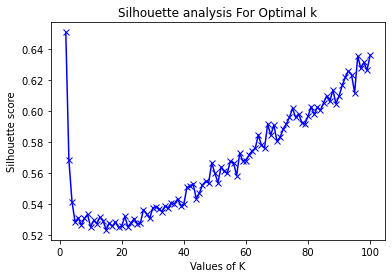

In [7]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters).fit(data)
    # silhouette score
    silhouette_avg.append(silhouette_score(data, kmeans.labels_))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
    

plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [8]:
silhouette_avg

[0.6508493362506552,
 0.5683435248072863,
 0.5414350420018745,
 0.5280780125041218,
 0.5310575018327153,
 0.5262858185787823,
 0.5306146669635137,
 0.533234890338452,
 0.5249643823185515,
 0.529481191686132,
 0.527292297265383,
 0.5315153911134093,
 0.5291157372933604,
 0.5231869514421982,
 0.5276002065496321,
 0.5254730805721719,
 0.5284167796524126,
 0.5247848659258315,
 0.5256562495442448,
 0.5318540141913897,
 0.5252275633111914,
 0.5277524196949822,
 0.5304699176887556,
 0.5270307567231957,
 0.5275615114698787,
 0.5362193076849159,
 0.5334891721212185,
 0.5306088551240733,
 0.5372775698419767,
 0.5382132119458612,
 0.5369526083172127,
 0.5350066098192525,
 0.538562605244021,
 0.5373772634876461,
 0.5405771790174065,
 0.5401369925910782,
 0.5431970510138939,
 0.5389068506249279,
 0.5398379276660832,
 0.5506445067759658,
 0.5513408271509423,
 0.5529474049534158,
 0.5433914308006341,
 0.5469577114632211,
 0.5522054810441065,
 0.5545145179330396,
 0.5536957231628772,
 0.56652768121924

# Plotting all the housing data

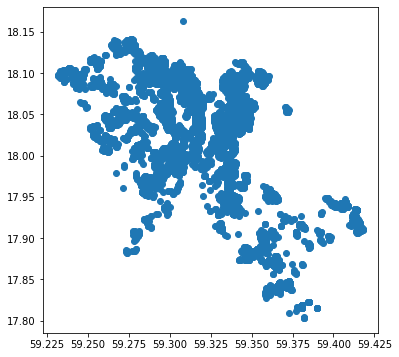

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,6)) 
ax = fig.add_subplot(1, 1, 1)
ax.scatter(data[:,0],data[:,1])
fig.canvas.draw()

#ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red')

fig.canvas.draw()

# Plotting 2 clusters based on location (Latitude, Longitude) and the price.

### It shows that prices in the center are higher than in the outskirts.

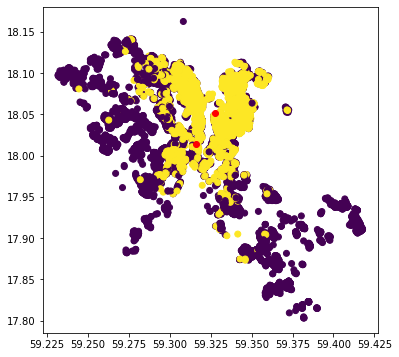

In [10]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(data)

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,6)) 
ax = fig.add_subplot(1, 1, 1)
ax.scatter(data[:,0],data[:,1], c = kmeans.labels_)
fig.canvas.draw()

ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red')

fig.canvas.draw()

# 1 Room apartment 


In [11]:
df_housing_room = df_housing[df_housing['Rooms'] == 1]
#df_type_room = df_housing[df_housing['accommodates'] == 2]
#df_housing_room = df_housing
df_housing_room

Date                   Adress  Size  Rooms         Broker  Rent  \
0     20221021              Jarlaplan 4  20.0      1  Gabriel Bilir   780   
1      2022099             Odengatan 49  20.0      1        Unknown   363   
2     20200428          Rehnsgatan 12 A  20.0      1        Unknown  1217   
3     20220216          Skillinggränd 9  20.0      1        Unknown  1159   
4      2022105  Birger Jarlsgatan 104 G  20.0      1  Simon Hedlund  1467   
...        ...                      ...   ...    ...            ...   ...   
6199  20220823         Hammarby Allé 11  56.0      1        Unknown  3515   
6402   2022033      Brännkyrkagatan 34B  57.0      1        Unknown  2090   
6955  20211214             Karlaplan 14  59.0      1        Unknown  1883   
7098  20211112        Luftskeppsgatan 8  59.0      1        Unknown  3929   
7171  20221130       Norra Agnegatan 38  60.0      1        Unknown  2200   

         Price  NearbyPOIs   Latitude  Longitude  
0      3020000        1300  59.344354  18.062210  
1      2780000        1300  59.344004  18.056030  
2      2580000        1300  59.343304  18.060150  
3      2790000        1300  59.327895  18.049164  
4      2650000        1200  59.347505  18.062897  
...        ...         ...        ...        ...  
6199   3750000         563  59.301965  18.082123  
6402   5500000        1600  59.319838  18.062210  
6955  11250000         476  59.338052  18.091049  
7098   2250000          15  59.264787  18.134308  
7171   5300000        1100  59.332448  18.043671  

[2380 rows x 10 columns]

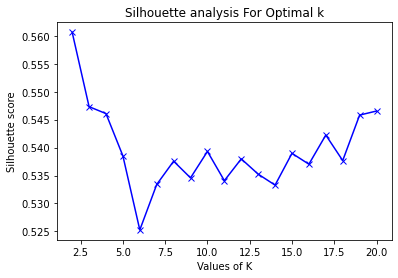

In [15]:
data_room = np.array(list(df_housing_room[['Latitude', 'Longitude', 'Price']].apply(tuple, axis=1)))

#####

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters).fit(data_room)
    # silhouette score
    silhouette_avg.append(silhouette_score(data_room, kmeans.labels_))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
    

plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [16]:
silhouette_avg

[0.5606449310540619,
 0.5473212984713854,
 0.5460806777146997,
 0.5385131489447095,
 0.5252598706243982,
 0.5333899563129555,
 0.5375634178233744,
 0.5345777693980804,
 0.5393067197180763,
 0.5340777290837355,
 0.5379774314824706,
 0.5352460949100736,
 0.5332796520881192,
 0.5389682178651121,
 0.5370248127424946,
 0.5422420584052021,
 0.5376747633058253,
 0.5458155370164551,
 0.5465419930091004]

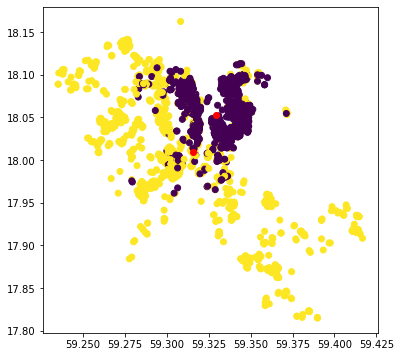

In [17]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(data_room)

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,6)) 
ax = fig.add_subplot(1, 1, 1)
ax.scatter(data_room[:,0],data_room[:,1], c = kmeans.labels_)
fig.canvas.draw()

ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red')

fig.canvas.draw()

In [24]:
result = zip(data_room , kmeans.labels_)

sortedR = sorted(result, key=lambda x: x[1])
#t = np.where(kmeans.labels_ == 1)
sortedR

[(array([5.93443540e+01, 1.80622101e+01, 3.02000000e+06]), 0),
 (array([5.93145821e+01, 1.80793762e+01, 2.97000000e+06]), 0),
 (array([5.93142317e+01, 1.80848694e+01, 3.10000000e+06]), 0),
 (array([5.93387519e+01, 1.80340576e+01, 3.00000000e+06]), 0),
 (array([5.93184364e+01, 1.80388641e+01, 3.00000000e+06]), 0),
 (array([5.93292962e+01, 1.80464172e+01, 2.95000000e+06]), 0),
 (array([5.93338492e+01, 1.80855560e+01, 3.10000000e+06]), 0),
 (array([5.93363006e+01, 1.80862427e+01, 3.25000000e+06]), 0),
 (array([5.93352501e+01, 1.80361176e+01, 3.32500000e+06]), 0),
 (array([5.93107273e+01, 1.80718231e+01, 2.97000000e+06]), 0),
 (array([5.93352501e+01, 1.80786896e+01, 2.99500000e+06]), 0),
 (array([5.93391020e+01, 1.80512238e+01, 3.10000000e+06]), 0),
 (array([5.93320981e+01, 1.80834961e+01, 4.50000000e+06]), 0),
 (array([5.93419032e+01, 1.80773163e+01, 3.25000000e+06]), 0),
 (array([5.93426034e+01, 1.80800629e+01, 3.32500000e+06]), 0),
 (array([5.93412029e+01, 1.80855560e+01, 3.35000000e+06

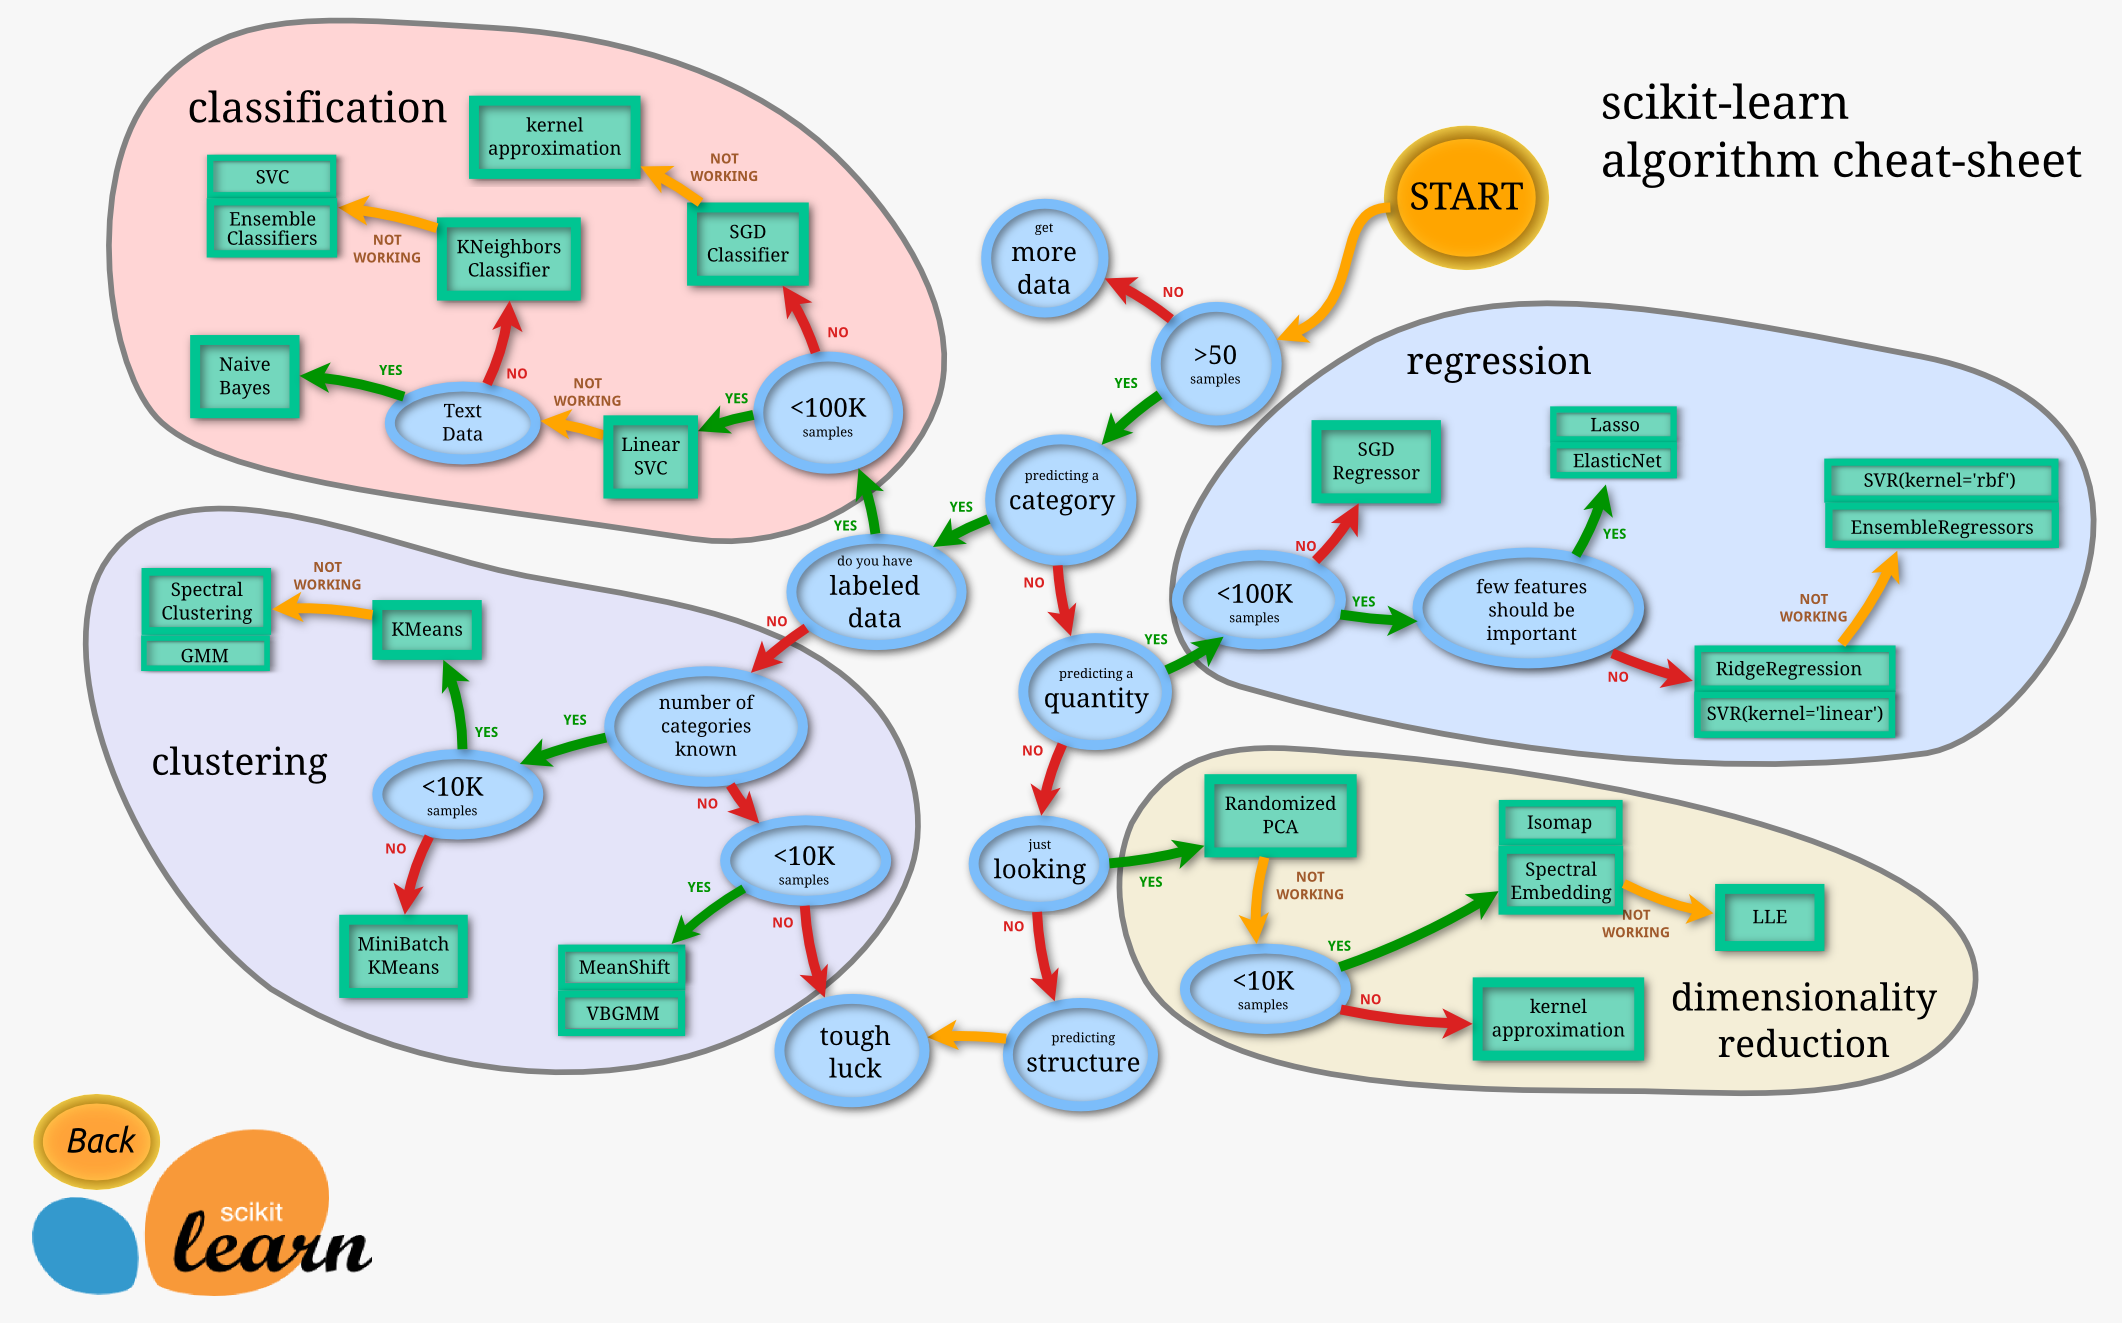

## Inside AIRBNB data 

In [71]:
### Inside AIRBNB data 

from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

df_stock = pd.read_csv('./Data/listings_Stockholm.csv')
pd.set_option('display.max_columns', None)



In [72]:
df_stock_cut = df_stock[['latitude', 'longitude', 'neighbourhood_cleansed']]
df_stock_cut

latitude  longitude neighbourhood_cleansed
0     59.301170  18.128330             Skarpnäcks
1     59.316400  18.161120             Östermalms
2     59.402500  17.988280         Rinkeby-Tensta
3     59.313890  18.060870             Södermalms
4     59.317020  18.029460             Södermalms
...         ...        ...                    ...
3985  59.349990  17.919018                 Bromma
3986  59.351926  17.918304                 Bromma
3987  59.350428  17.920177                 Bromma
3988  59.381868  17.950787         Rinkeby-Tensta
3989  59.334611  18.083416             Östermalms

[3990 rows x 3 columns]

# Transforming neighbourhoods into numerical values

In [73]:
neighbourhoods_data_transform = ['Södermalms', 'Östermalms', 'Norrmalms', 'Kungsholmens', 'Bromma', 'Hägersten-Liljeholmens', 'Enskede-Årsta-Vantörs', 'Skarpnäcks', 'Rinkeby-Tensta', 'Hässelby-Vällingby', 'Älvsjö', 'Spånga-Tensta', 'Farsta', 'Skärholmens']
def neighbourhood_to_numeric(x):
        if x in neighbourhoods_data_transform:
            return neighbourhoods_data_transform.index(x)


df_stock_cut['neighbourhood_cleansed'] = df_stock_cut['neighbourhood_cleansed'].apply(neighbourhood_to_numeric)
df_stock_cut

C:\Users\Yann\AppData\Local\Temp\ipykernel_6124\1341939304.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_cut['neighbourhood_cleansed'] = df_stock_cut['neighbourhood_cleansed'].apply(neighbourhood_to_numeric)


latitude  longitude  neighbourhood_cleansed
0     59.301170  18.128330                       7
1     59.316400  18.161120                       1
2     59.402500  17.988280                       8
3     59.313890  18.060870                       0
4     59.317020  18.029460                       0
...         ...        ...                     ...
3985  59.349990  17.919018                       4
3986  59.351926  17.918304                       4
3987  59.350428  17.920177                       4
3988  59.381868  17.950787                       8
3989  59.334611  18.083416                       1

[3990 rows x 3 columns]

In [74]:
df_stock_cut_neighborhood = df_stock_cut.drop(columns=['neighbourhood_cleansed'])
df_stock_cut_neighborhood

latitude  longitude
0     59.301170  18.128330
1     59.316400  18.161120
2     59.402500  17.988280
3     59.313890  18.060870
4     59.317020  18.029460
...         ...        ...
3985  59.349990  17.919018
3986  59.351926  17.918304
3987  59.350428  17.920177
3988  59.381868  17.950787
3989  59.334611  18.083416

[3990 rows x 2 columns]

# Train & test set

In [162]:
x_train,x_test,y_train,y_test = train_test_split(df_stock_cut_neighborhood, df_stock_cut['neighbourhood_cleansed'], random_state=0, train_size =0.2)




# Linear SVC

In [163]:
LSVC = LinearSVC()

LSVC.fit(x_train,y_train)
y_test_LSVC_model = LSVC.predict(x_test)
print("LSVC Accuracy :", accuracy_score(y_test, y_test_LSVC_model))

LSVC Accuracy : 0.2706766917293233


C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# KNearestNeighbor 

In [153]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=2)

# Train the model using the training sets
model.fit(x_train,y_train)

model.score(x_test,y_test)

#Predict Output
predicted= model.predict(x_test)
print("KNeighbor Accuracy :", accuracy_score(y_test, predicted))


KNeighbor Accuracy : 0.9586466165413534


In [167]:
test = model.predict(x2.iloc[[10]])
test[0]

3

In [174]:
test = model.predict([[59.349990,17.919018]])[0]
test

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


4

In [155]:
x2.iloc[10]

latitude     59.33266
longitude    18.02663
Name: 675, dtype: float64

## Optimal value of K

In [156]:
trainAccuracy=[]
testAccuracy=[]

In [157]:
#create model for K values from 1 to 40
for k in range(1,40):
    model_knn=KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(x_train,y_train)
    trainAccuracy.append(model_knn.score(x_train,y_train))
    testAccuracy.append(model_knn.score(x_test,y_test))

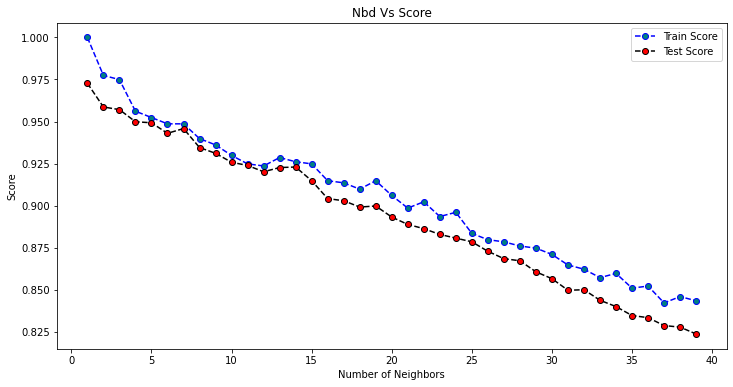

In [158]:
#create a plot using the information from the above loop
plt.figure(figsize=(12,6))
plt.plot(range(1,40),trainAccuracy,label="Train Score",marker="o",markerfacecolor="teal",color="blue",linestyle="dashed")
plt.plot(range(1,40),testAccuracy,label="Test Score",marker="o",markerfacecolor="red",color="black",linestyle="dashed")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Score")
plt.title("Nbd Vs Score")
plt.show()

In [159]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[793,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  4, 320,   3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  2,  14, 285,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   2, 273,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,  12, 249,   0,   0,   0,   0,   5,   0,   1,   0,
          0],
       [  0,   0,   0,   5,   0, 227,   0,   0,   0,   0,   0,   0,   0,
          1],
       [  1,   0,   0,   0,   0,   6, 219,   0,   0,   0,   0,   0,   5,
          0],
       [  1,   7,   0,   0,   0,   0,   4, 169,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   8,   0,   0,   0, 131,   0,   0,   9,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 108,   0,   2,   0,
          0],
       [  0,   0,   0,   0,   0,   1,   5,   0,   0,   0,  94,   0,   0,
          0],
       [  0,   0,   0,   0,   4,   0,   0, 

Text(159.0, 0.5, 'Actual')

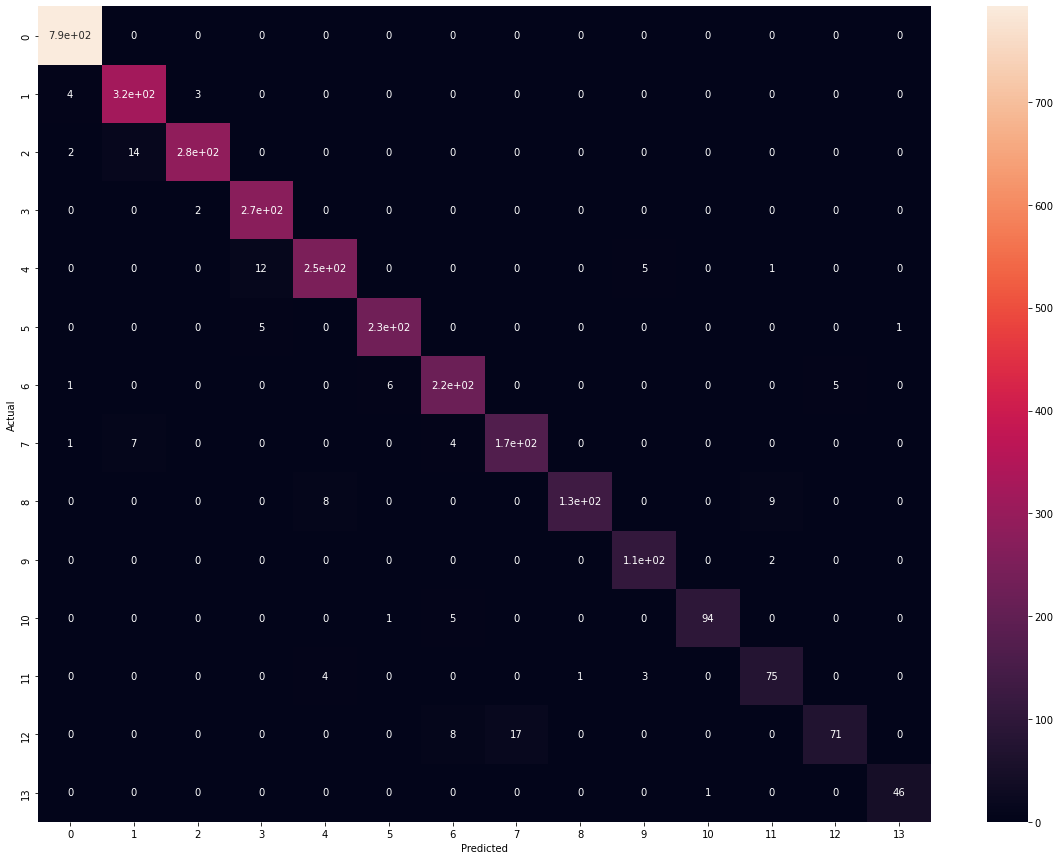

In [160]:
import seaborn as sns

#plot confusion matrix
plt.figure(figsize=(20,15))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [161]:
from sklearn.metrics import classification_report

#Classification Report
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.99      1.00      0.99       793
           1       0.94      0.98      0.96       327
           2       0.98      0.95      0.96       301
           3       0.94      0.99      0.97       275
           4       0.95      0.93      0.94       267
           5       0.97      0.97      0.97       233
           6       0.93      0.95      0.94       231
           7       0.91      0.93      0.92       181
           8       0.99      0.89      0.94       148
           9       0.93      0.98      0.96       110
          10       0.99      0.94      0.96       100
          11       0.86      0.90      0.88        83
          12       0.93      0.74      0.83        96
          13       0.98      0.98      0.98        47

    accuracy                           0.96      3192
   macro avg       0.95      0.94      0.94      3192
weighted avg       0.96      0.96      0.96      3192



### 2 is the perfect amount of K-neighbours required  

In [202]:
# Filling the data with the predictions 
#df_housing['Neighbourhood'] = model.predict([[df_housing['Latitude'], df_housing['Longitude'] ]])[0]
#df_housing['Neighbourhood'] = df_housing['Latitude'] * df_housing['Longitude'] 

In [187]:
def resetCleaning(x):
    return 0

df_housing['Neighbourhood'] = df_housing['Neighbourhood'].apply(resetCleaning)
df_housing

level_0  index      Date  \
0            0      0  20221021   
1            1      1   2022099   
2            2      2  20200428   
3            3      3  20220216   
4            4      4   2022105   
...        ...    ...       ...   
10572    10572  10572   2021082   
10573    10573  10573   2021056   
10574    10574  10574  20210917   
10575    10575  10575   2022039   
10576    10576  10576  20220329   

                                                Adress  Size  Rooms  \
0                                          Jarlaplan 4  20.0      1   
1                                         Odengatan 49  20.0      1   
2                                      Rehnsgatan 12 A  20.0      1   
3                                      Skillinggränd 9  20.0      1   
4                              Birger Jarlsgatan 104 G  20.0      1   
...                                                ...   ...    ...   
10572                                    Flystagränd 5  76.0      3   
10573                     Drivbänksvägen 11 A (D 1001)  76.0      3   
10574                               Berghamnsvägen 61C  76.0      3   
10575  Havsörnsvägen 8 - Nyrenoverad högt upp i huset!  76.0      3   
10576                   Havsörnsvägen 8 - Nyrenoverad!  76.0      3   

              Broker  Rent    Price  NearbyPOIs   Latitude  Longitude  \
0      Gabriel Bilir   780  3020000        1300  59.344354  18.062210   
1            Unknown   363  2780000        1300  59.344004  18.056030   
2            Unknown  1217  2580000        1300  59.343304  18.060150   
3            Unknown  1159  2790000        1300  59.327895  18.049164   
4      Simon Hedlund  1467  2650000        1200  59.347505  18.062897   
...              ...   ...      ...         ...        ...        ...   
10572        Unknown  4052  2350000          17  59.362904  17.907028   
10573  Micaela Rebel  4446  2995000           8  59.381095  17.819138   
10574        Unknown  3397  4350000           7  59.373050  17.809525   
10575  Kais Ghedamsi  3936  2725000           4  59.247588  18.062210   
10576  Kais Ghedamsi  3937  2750000           4  59.247588  18.062210   

       Neighbourhood  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
10572              0  
10573              0  
10574              0  
10575              0  
10576              0  

[10577 rows x 13 columns]

In [191]:
#df_housing = df_housing.reset_index()  # make sure indexes pair with number of rows

for index, row in df_housing.iterrows():
    ifor_val = model.predict([[row['Latitude'], row['Longitude'] ]])[0]
    df_housing.at[index,'Neighbourhood'] = ifor_val

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

In [208]:
df_housing_room

level_0  index      Date                   Adress  Size  Rooms  \
0           0      0  20221021              Jarlaplan 4  20.0      1   
1           1      1   2022099             Odengatan 49  20.0      1   
2           2      2  20200428          Rehnsgatan 12 A  20.0      1   
3           3      3  20220216          Skillinggränd 9  20.0      1   
4           4      4   2022105  Birger Jarlsgatan 104 G  20.0      1   
...       ...    ...       ...                      ...   ...    ...   
6199     6199   6199  20220823         Hammarby Allé 11  56.0      1   
6402     6402   6402   2022033      Brännkyrkagatan 34B  57.0      1   
6955     6955   6955  20211214             Karlaplan 14  59.0      1   
7098     7098   7098  20211112        Luftskeppsgatan 8  59.0      1   
7171     7171   7171  20221130       Norra Agnegatan 38  60.0      1   

             Broker  Rent     Price  NearbyPOIs   Latitude  Longitude  \
0     Gabriel Bilir   780   3020000        1300  59.344354  18.062210   
1           Unknown   363   2780000        1300  59.344004  18.056030   
2           Unknown  1217   2580000        1300  59.343304  18.060150   
3           Unknown  1159   2790000        1300  59.327895  18.049164   
4     Simon Hedlund  1467   2650000        1200  59.347505  18.062897   
...             ...   ...       ...         ...        ...        ...   
6199        Unknown  3515   3750000         563  59.301965  18.082123   
6402        Unknown  2090   5500000        1600  59.319838  18.062210   
6955        Unknown  1883  11250000         476  59.338052  18.091049   
7098        Unknown  3929   2250000          15  59.264787  18.134308   
7171        Unknown  2200   5300000        1100  59.332448  18.043671   

      Neighbourhood  
0                 1  
1                 2  
2                 2  
3                 3  
4                 2  
...             ...  
6199              6  
6402              0  
6955              1  
7098              7  
7171              3  

[2380 rows x 13 columns]

# FOR ONE ROOM - PRICE

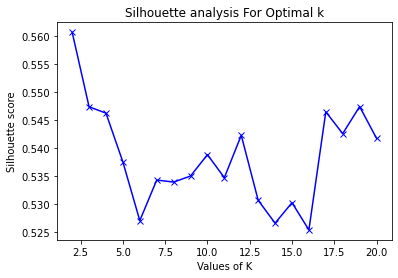

In [239]:
###### FOR ONE ROOM PRICE
df_housing_room = df_housing[df_housing['Rooms'] == 1]

data_room = np.array(list(df_housing_room[['Neighbourhood', 'Price']].apply(tuple, axis=1)))
data_for_plotting = np.array(list(df_housing_room[['Latitude', 'Longitude', 'Neighbourhood', 'Price']].apply(tuple, axis=1)))
#####

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters).fit(data_room)
    # silhouette score
    silhouette_avg.append(silhouette_score(data_room, kmeans.labels_))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
    

plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [240]:
data_for_plotting

array([[5.93443540e+01, 1.80622101e+01, 1.00000000e+00, 3.02000000e+06],
       [5.93440039e+01, 1.80560303e+01, 2.00000000e+00, 2.78000000e+06],
       [5.93433037e+01, 1.80601501e+01, 2.00000000e+00, 2.58000000e+06],
       ...,
       [5.93380515e+01, 1.80910492e+01, 1.00000000e+00, 1.12500000e+07],
       [5.92647872e+01, 1.81343079e+01, 7.00000000e+00, 2.25000000e+06],
       [5.93324484e+01, 1.80436707e+01, 3.00000000e+00, 5.30000000e+06]])

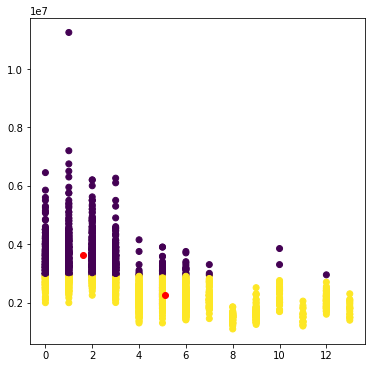

In [241]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(data_room)

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,6)) 
ax = fig.add_subplot(1, 1, 1)
ax.scatter(data_room[:,0],data_room[:,1], c = kmeans.labels_)
fig.canvas.draw()

ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red')

fig.canvas.draw()

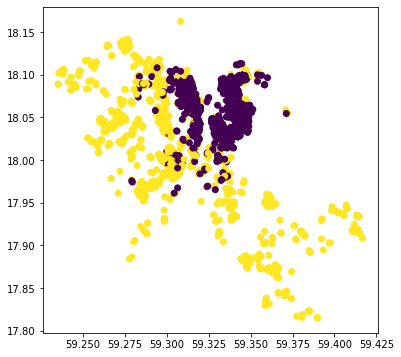

In [242]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(data_room)

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,6)) 
ax = fig.add_subplot(1, 1, 1)
ax.scatter(data_for_plotting[:,0],data_for_plotting[:,1], c = kmeans.labels_)
fig.canvas.draw()

#ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red')

fig.canvas.draw()

In [235]:
# seems like the housing data rent is 

data_for_plotting

array([[5.93443540e+01, 1.80622101e+01, 1.00000000e+00, 7.80000000e+02],
       [5.93440039e+01, 1.80560303e+01, 2.00000000e+00, 3.63000000e+02],
       [5.93433037e+01, 1.80601501e+01, 2.00000000e+00, 1.21700000e+03],
       ...,
       [5.93380515e+01, 1.80910492e+01, 1.00000000e+00, 1.88300000e+03],
       [5.92647872e+01, 1.81343079e+01, 7.00000000e+00, 3.92900000e+03],
       [5.93324484e+01, 1.80436707e+01, 3.00000000e+00, 2.20000000e+03]])

# For one ROOM - RENT

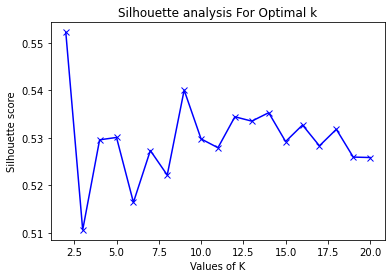

In [244]:
###### FOR ONE ROOM RENT
df_housing_room = df_housing[df_housing['Rooms'] == 1]

data_room = np.array(list(df_housing_room[['Neighbourhood', 'Rent']].apply(tuple, axis=1)))
data_for_plotting = np.array(list(df_housing_room[['Latitude', 'Longitude', 'Neighbourhood', 'Rent']].apply(tuple, axis=1)))
#####

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters).fit(data_room)
    # silhouette score
    silhouette_avg.append(silhouette_score(data_room, kmeans.labels_))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
    

plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

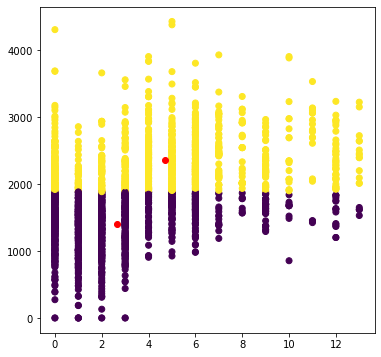

In [246]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(data_room)

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,6)) 
ax = fig.add_subplot(1, 1, 1)
ax.scatter(data_room[:,0],data_room[:,1], c = kmeans.labels_)
fig.canvas.draw()

ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red')

fig.canvas.draw()

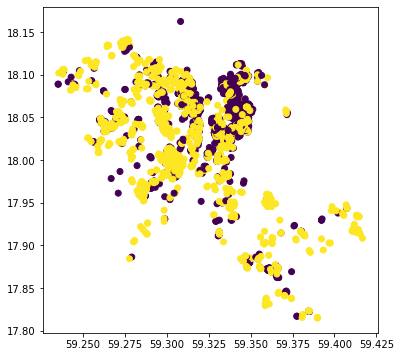

In [247]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(data_room)

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,6)) 
ax = fig.add_subplot(1, 1, 1)
ax.scatter(data_for_plotting[:,0],data_for_plotting[:,1], c = kmeans.labels_)
fig.canvas.draw()

#ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red')

fig.canvas.draw()